# PRÉ-PROCESSAMENTO DE DADOS

In [122]:
!pip install regex
!pip install pyspellchecker
!pip install nltk
!pip install numpy
#instalação de todos as bibliotecas necessárias para o pré-processamento de dados.

In [123]:
import pandas as pd
import regex as re
from spellchecker import SpellChecker
from urllib.parse import urlparse
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords') #importação de todas as bibliotecas.

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
from google.colab import drive
drive.mount('/content/drive') #conexão com o google drive (onde está o banco de dados)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
data = pd.read_excel('/content/drive/MyDrive/IA-projeto/DATABASE.xlsx', dtype={'TEXT': str})
data # leitura do excel em que está contido o banco de dados.

,URL,TEXT,RESULTADO
0,NaN,NaN,NaN
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina: Número de cidades em emergênci...,news
2,https://noticias.uol.com.br/internacional/ulti...,Irã: Presidente era conhecido como 'carniceiro...,news
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news
4,NaN,NaN,NaN
...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69% dos pacientes co...,news
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news


**Sobre o banco de dados**:

Foi feito utilizando notícias e fake news encontradas em redes sociais e portais de notícia. Toda linha possui a informação do domínio em que foi encontrado (URL) e também o texto em que será apontado se é uma notícia falsa ou não. Ambas são valores de texto que serão transformados em valores contínuos para realizar o treinamento do modelo.

In [126]:
data = data.dropna()
data #retirado linhas vazias

,URL,TEXT,RESULTADO
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina: Número de cidades em emergênci...,news
2,https://noticias.uol.com.br/internacional/ulti...,Irã: Presidente era conhecido como 'carniceiro...,news
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou 100 MILHÕES visitando monstros...,fake news
...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69% dos pacientes co...,news
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news


In [127]:
def remove_urls(text): #retira links que podem ter sido copiados, por meio da indicação do 'http'
    return re.sub(r'http\S+', '', text)

data['TEXT'] = data['TEXT'].apply(remove_urls)
data['TEXT'].loc[29]

<ipython-input-127-bd38195b3c27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TEXT'] = data['TEXT'].apply(remove_urls)


'Prévia da inflação desacelera para 0,3% em julho, diz IBGE\n\n🔸 Leia no Poder360:\n '

In [128]:
data['TEXT'] = data['TEXT'].astype(str) #transforma o texto da notícia em str
data['TEXT'] = data['TEXT'].str.replace('\n', ' ') #/n proveniente de quebra de texto dos html, substituído por um ' '
data

<ipython-input-128-9c9cc520e24a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TEXT'] = data['TEXT'].astype(str) #transforma o texto da notícia em str
<ipython-input-128-9c9cc520e24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TEXT'] = data['TEXT'].str.replace('\n', ' ') #/n proveniente de quebra de texto dos html, substituído por um ' '


,URL,TEXT,RESULTADO
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina: Número de cidades em emergênci...,news
2,https://noticias.uol.com.br/internacional/ulti...,Irã: Presidente era conhecido como 'carniceiro...,news
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou 100 MILHÕES visitando monstros...,fake news
...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69% dos pacientes co...,news
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news


In [129]:
def count_emojis(text): #função que conta emojis e símbolos não utilizados na ortografia comum.
    emoji_pattern = re.compile(
        r'['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'  # other symbols
        u'\U000024C2-\U0001F251'
        ']+', flags=re.UNICODE)
    return len(emoji_pattern.findall(text))

In [130]:
data['count_emoji'] = data['TEXT'].apply(count_emojis) #primeiro parâmetro que será utilizado para o treinamento da IA
data


<ipython-input-130-f44d1ac46fd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_emoji'] = data['TEXT'].apply(count_emojis) #primeiro parâmetro que será utilizado para o treinamento da IA


,URL,TEXT,RESULTADO,count_emoji
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina: Número de cidades em emergênci...,news,0
2,https://noticias.uol.com.br/internacional/ulti...,Irã: Presidente era conhecido como 'carniceiro...,news,0
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou 100 MILHÕES visitando monstros...,fake news,0
...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69% dos pacientes co...,news,0
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0


In [131]:
def uppercase_percentage(text): #função que calcula a porcentagem de letras em maíscula no texto
    total_letters = sum(1 for char in text if char.isalpha())
    if total_letters == 0:
        return 0
    uppercase_count = sum(1 for char in text if char.isupper())
    percentage = (uppercase_count / total_letters)
    return percentage

In [132]:
data['uppercase_percentage'] = data['TEXT'].apply(uppercase_percentage) #segundo parâmetro que será utilizado para o treinamento da IA
data

<ipython-input-132-d0ce0112b598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['uppercase_percentage'] = data['TEXT'].apply(uppercase_percentage) #segundo parâmetro que será utilizado para o treinamento da IA


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina: Número de cidades em emergênci...,news,0,0.066246
2,https://noticias.uol.com.br/internacional/ulti...,Irã: Presidente era conhecido como 'carniceiro...,news,0,0.058005
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou 100 MILHÕES visitando monstros...,fake news,0,0.135593
...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69% dos pacientes co...,news,0,0.092105
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680


In [133]:
def count_special_chars(text): #função que conta a quantidade de exclamações no texto
    special_chars = ['!']
    return sum(1 for char in text if char in special_chars)

In [134]:
data['special_char_count'] = data['TEXT'].apply(count_special_chars) #terceiro parâmetro utilizado no treinamento da IA
data

<ipython-input-134-23a5e41feb5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['special_char_count'] = data['TEXT'].apply(count_special_chars) #terceiro parâmetro utilizado no treinamento da IA


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina: Número de cidades em emergênci...,news,0,0.066246,0
2,https://noticias.uol.com.br/internacional/ulti...,Irã: Presidente era conhecido como 'carniceiro...,news,0,0.058005,0
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou 100 MILHÕES visitando monstros...,fake news,0,0.135593,1
...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69% dos pacientes co...,news,0,0.092105,0
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0


In [135]:
def remove_special_characters(text): #remove todos os caracteres especiais para ser possível fazer operações no texto corretamente
    pattern = r'[^\w\s]'
    clean_text = re.sub(pattern, ' ', text)
    return clean_text

In [136]:
data['TEXT'] = data['TEXT'].apply(remove_special_characters)
data

<ipython-input-136-b24a00412651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TEXT'] = data['TEXT'].apply(remove_special_characters)


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou 100 MILHÕES visitando monstros...,fake news,0,0.135593,1
...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que 69 dos pacientes co...,news,0,0.092105,0
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0


In [137]:
'''def insert_space_between_lower_upper_and_numbers(text):
    clean_text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    clean_text = re.sub(r'([a-zA-Z])([0-9])', r'\1 \2', clean_text)
    clean_text = re.sub(r'([0-9])([a-zA-Z])', r'\1 \2', clean_text)
    return clean_text'''


"def insert_space_between_lower_upper_and_numbers(text):\n    clean_text = re.sub(r'([a-z])([A-Z])', r'\x01 \x02', text)\n    clean_text = re.sub(r'([a-zA-Z])([0-9])', r'\x01 \x02', clean_text)\n    clean_text = re.sub(r'([0-9])([a-zA-Z])', r'\x01 \x02', clean_text)\n    return clean_text"

In [138]:
'''data['TEXT'] = data['TEXT'].apply(insert_space_between_lower_upper_and_numbers)
data'''

"data['TEXT'] = data['TEXT'].apply(insert_space_between_lower_upper_and_numbers)\ndata"

In [139]:
def remove_numbers(text): #remove os números da notícia para conseguir fazer operações no texto
    return re.sub(r'\b\w*\d\w*\b', '', text).strip()

In [140]:
data['TEXT'] = data['TEXT'].apply(remove_numbers)
data

<ipython-input-140-382c2ec2ba24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TEXT'] = data['TEXT'].apply(remove_numbers)


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou MILHÕES visitando monstros di...,fake news,0,0.135593,1
...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que dos pacientes com ...,news,0,0.092105,0
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0


In [141]:
spell_pt = SpellChecker(language='pt') #uma biblioteca NLP que identifica palavras em português.
spell_en = SpellChecker(language='en') #palavras em inglês tbm
def check_spelling_percentage(text, spell_pt, spell_en):
    words = text.split()
    total_words = len(words)
    if total_words == 0:
        return 0
    error_count = 0
    for word in words:
        if word not in spell_pt and word not in spell_en:
            error_count += 1
    error_percentage = (error_count / total_words)
    return error_percentage #retorna a porcentagem de erros de ortografia no texto.

In [142]:
data['error_count'] = data['TEXT'].apply(lambda x: check_spelling_percentage(x, spell_pt, spell_en)) #outro parâmetro utilizado no treinamento da IA
data

<ipython-input-142-02099795bb57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['error_count'] = data['TEXT'].apply(lambda x: check_spelling_percentage(x, spell_pt, spell_en)) #outro parâmetro utilizado no treinamento da IA


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0,0.090909
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0,0.150000
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0,0.153846
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0,0.000000
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou MILHÕES visitando monstros di...,fake news,0,0.135593,1,0.111111
...,...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0,0.103448
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que dos pacientes com ...,news,0,0.092105,0,0.000000
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0,0.047619
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0,0.071429


In [143]:

def extract_info(url): #função que será utilizada para retirar todas as informações necessárias da URL.
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc

    # Remove o prefixo 'www.' do netloc se estiver presente
    if netloc.startswith('www.'):
        netloc = netloc[4:]

    fragment = parsed_url.fragment # pega o fragmento do caminho
    path = parsed_url.path

    # Se o fragmento estiver vazio, usa o caminho como fallback
    if not fragment:
        fragment = path

    # Tokenizar o fragmento ou caminho
    words = re.split(r'[^\w]+', fragment)
    words = [word for word in words if word]

    # Manter apenas o primeiro token
    first_token = words[0] if words else ''


    return {
        'netloc': netloc, #retorna o netloc
        'fragmet': first_token #fragment da URL
    }


In [144]:
data[['netloc', 'tokenized_fragment']] = data['URL'].apply(lambda x: pd.Series(extract_info(x))) #outros dois parâmetros que serão necessários para o treinamento do modelo
data

<ipython-input-144-019857a2cd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['netloc', 'tokenized_fragment']] = data['URL'].apply(lambda x: pd.Series(extract_info(x))) #outros dois parâmetros que serão necessários para o treinamento do modelo
<ipython-input-144-019857a2cd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['netloc', 'tokenized_fragment']] = data['URL'].apply(lambda x: pd.Series(extract_info(x))) #outros dois parâmetros que serão necessários para o treinamento do modelo


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,netloc,tokenized_fragment
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0,0.090909,noticias.uol.com.br,cotidiano
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0,0.150000,noticias.uol.com.br,internacional
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0,0.153846,uol.com.br,esporte
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0,0.000000,fotografia.folha.uol.com.br,galerias
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou MILHÕES visitando monstros di...,fake news,0,0.135593,1,0.111111,x.com,joao_jb22
...,...,...,...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0,0.103448,estadao.com.br,esportes
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que dos pacientes com ...,news,0,0.092105,0,0.000000,medicinasa.com.br,asma
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0,0.047619,aguasustentavel.org.br,conteudo
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0,0.071429,ge.globo.com,futebol


In [145]:
def extract_important_part(netloc):
    parts = re.findall(r'([a-zA-Z0-9]+)\.', netloc)
    # Remover a última parte se for um dos domínios comuns
    if parts and parts[-1] in {'com', 'net', 'org', 'gov', 'edu', 'br'}:
        parts = parts[:-1]
    # Remover 'web' se estiver em qualquer parte da lista
    parts = [part for part in parts if part != 'web']
    return ' '.join(parts)

data['important_part'] = data['netloc'].apply(extract_important_part) #armazena na data


<ipython-input-145-82af1d736f29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['important_part'] = data['netloc'].apply(extract_important_part) #armazena na data


In [146]:
dfTrue = data.query("RESULTADO == 'news'")
dfTrue #pega somente as notícias verdadeiras

,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,netloc,tokenized_fragment,important_part
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0,0.090909,noticias.uol.com.br,cotidiano,noticias uol
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0,0.150000,noticias.uol.com.br,internacional,noticias uol
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0,0.153846,uol.com.br,esporte,uol
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0,0.000000,fotografia.folha.uol.com.br,galerias,fotografia folha uol
7,https://x.com/folha/status/1816524260338495746,Incentivos fiscais revertem R bi para cultur...,news,0,0.032258,0,0.083333,x.com,folha,x
8,https://x.com/folha/status/1816518997657158097,Mansão mais cara do Brasil é vendida no Leblon...,news,0,0.081633,0,0.166667,x.com,folha,x
9,https://x.com/Estadao/status/1816531359529406511,Beyoncé oferece bolsa de estudos para alunos d...,news,0,0.051724,0,0.142857,x.com,Estadao,x
10,https://www.instagram.com/p/C7NUY9FRfdg/,O governo do presidente Lula PT vai conceder...,news,0,0.041995,0,0.063291,instagram.com,p,instagram
13,https://www.unifesp.br/noticias-anteriores/ite...,Vírus do passado descoberta em ossos neandert...,news,0,0.035433,0,0.086957,unifesp.br,noticias,unifesp
14,https://jornal.usp.br/comunicados/usp-fortalec...,USP fortalece acordos e estreita parcerias com...,news,0,0.043478,0,0.119048,jornal.usp.br,comunicados,jornal usp


In [147]:
sociais = ['x','facebook','instagram','whatsapp','telegram','youtube','tiktok','kwai'] #redes sociais comuns em que são destiladas fake news.
def substituir_palavras(row): #essa função será muito importante para selecionar canais de notícia confiáveis. nesse momento, está salvando na lista_palavras_unicas todos os fragments e netlocs de notícias importantes
    palavras_importantes = row['important_part'].split()
    palavras_fragments = row['tokenized_fragment'].split()
    lista_final = []

    for i, palavra in enumerate(palavras_importantes):
        if palavra in sociais and i < len(palavras_fragments): #se a notícia verdadeira está em uma rede social, salvará o fragment na lista no lugar do netloc
            lista_final.append(palavras_fragments[i])
        else:
            lista_final.append(palavra)

    return lista_final

# Aplicar a função em cada linha do DataFrame e juntar todas as palavras em uma lista
lista_todas_palavras = []
for index, row in dfTrue.iterrows():
    lista_todas_palavras.extend(substituir_palavras(row))

# Remover duplicatas convertendo a lista em um set e depois de volta para uma lista
lista_palavras_unicas = list(set(lista_todas_palavras))
lista_palavras_unicas = [palavra for palavra in lista_palavras_unicas if len(palavra) > 1 and not palavra.isdigit()] #tira números ou letras estranhas (as vezes o fragment não é uma palavra)
lista_palavras_unicas = [palavra for palavra in lista_palavras_unicas if palavra not in ['search', 'watch']] #tirando fragments que são comuns das redes sociais no buscador.

print(lista_palavras_unicas)


['whatsapp', 'ge', 'usp', 'metropolesurgente', 'folhadesp', 'portalr7', 'Estadao', 'estadao', 'uol', 'abril', 'noticias', 'folha', 'globo', 'g1', 'Poder360', 'jornal', 'fotografia', 'medicinasa', 'aguasustentavel', 'veja', 'unifesp']


In [148]:
canais = ['uol','folha','estadao','metropoles','estadao','istoe','globo','oglobo','record','r7','cnn','cnnbrasil','g1','exame','gazetadopovo','bbc','veja','abril','folhadesp','portalr7'] #sites de pesquisa confiáveis padrões
canais = lista_palavras_unicas + canais
canais = list(set(canais))
canais #juntei tudo em canais (lista segura de canais de notícias)

['whatsapp',
 'metropoles',
 'ge',
 'gazetadopovo',
 'usp',
 'metropolesurgente',
 'folhadesp',
 'portalr7',
 'Estadao',
 'istoe',
 'exame',
 'uol',
 'estadao',
 'abril',
 'bbc',
 'noticias',
 'folha',
 'globo',
 'r7',
 'g1',
 'Poder360',
 'jornal',
 'fotografia',
 'medicinasa',
 'aguasustentavel',
 'cnn',
 'record',
 'oglobo',
 'veja',
 'unifesp',
 'cnnbrasil']

In [149]:
def check_channels(important_part, fragment): #verifica se a url da minha notícia está nos canais seguros
    words = important_part.lower().lower().split()
    for word in words:
        if word in canais:
            return True
    # Verificar se alguma palavra da fragment está na lista de canais (se o netloc nao estiver)
    fragment_words = fragment.lower().lower().split()
    for word in fragment_words:
        if word in canais:
            return True
    return False


data['is_in_channels'] = data.apply(lambda row: check_channels(row['important_part'], row['tokenized_fragment']), axis=1) #outro parâmetro importante para o treinamento da IA
data


<ipython-input-149-579d2be2cc4c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_in_channels'] = data.apply(lambda row: check_channels(row['important_part'], row['tokenized_fragment']), axis=1) #outro parâmetro importante para o treinamento da IA


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,netloc,tokenized_fragment,important_part,is_in_channels
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0,0.090909,noticias.uol.com.br,cotidiano,noticias uol,True
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0,0.150000,noticias.uol.com.br,internacional,noticias uol,True
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0,0.153846,uol.com.br,esporte,uol,True
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0,0.000000,fotografia.folha.uol.com.br,galerias,fotografia folha uol,True
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou MILHÕES visitando monstros di...,fake news,0,0.135593,1,0.111111,x.com,joao_jb22,x,False
...,...,...,...,...,...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0,0.103448,estadao.com.br,esportes,estadao,True
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que dos pacientes com ...,news,0,0.092105,0,0.000000,medicinasa.com.br,asma,medicinasa,True
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0,0.047619,aguasustentavel.org.br,conteudo,aguasustentavel,True
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0,0.071429,ge.globo.com,futebol,ge globo,True


In [150]:
def check_social(important_part): #verifica e marca se a notícia está em uma rede social.
    words = important_part.lower().split()
    for word in words:
        if word in canais:
            return True
    return False
data['is_in_social'] = data['netloc'].apply(check_social)
data

<ipython-input-150-d378911cf5fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_in_social'] = data['netloc'].apply(check_social)


,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,netloc,tokenized_fragment,important_part,is_in_channels,is_in_social
1,https://noticias.uol.com.br/cotidiano/ultimas-...,Santa Catarina Número de cidades em emergênci...,news,0,0.066246,0,0.090909,noticias.uol.com.br,cotidiano,noticias uol,True,False
2,https://noticias.uol.com.br/internacional/ulti...,Irã Presidente era conhecido como carniceiro...,news,0,0.058005,0,0.150000,noticias.uol.com.br,internacional,noticias uol,True,False
3,https://www.uol.com.br/esporte/futebol/ultimas...,Corinthians fala em negociação legal após denú...,news,0,0.069182,0,0.153846,uol.com.br,esporte,uol,True,False
5,https://fotografia.folha.uol.com.br/galerias/1...,Segundo hospital de campanha é aberto em Porto...,news,0,0.074468,0,0.000000,fotografia.folha.uol.com.br,galerias,fotografia folha uol,True,False
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou MILHÕES visitando monstros di...,fake news,0,0.135593,1,0.111111,x.com,joao_jb22,x,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
94,https://www.estadao.com.br/esportes/michel-aug...,Eliminação de judoca brasileiro nas Olimpíadas...,news,0,0.042683,0,0.103448,estadao.com.br,esportes,estadao,True,False
95,https://medicinasa.com.br/asma-grave/,Estudo inédito mostra que dos pacientes com ...,news,0,0.092105,0,0.000000,medicinasa.com.br,asma,medicinasa,True,False
96,https://www.aguasustentavel.org.br/conteudo/bl...,Os Efeitos da Elevação do Nível do Mar nas Pra...,news,0,0.144444,0,0.047619,aguasustentavel.org.br,conteudo,aguasustentavel,True,False
97,https://ge.globo.com/futebol/times/sao-paulo/n...,Sócios do São Paulo barram mudança que previa ...,news,0,0.032680,0,0.071429,ge.globo.com,futebol,ge globo,True,False


In [151]:
dataFake = data.query("RESULTADO == 'fake news'")
dataFake #separei somente meus dados falsos.

,URL,TEXT,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,netloc,tokenized_fragment,important_part,is_in_channels,is_in_social
6,https://x.com/joao_jb22/status/179254040114177...,Luladrão gastou MILHÕES visitando monstros di...,fake news,0,0.135593,1,0.111111,x.com,joao_jb22,x,False,False
15,https://web.telegram.org/k/#@aliancacombolsonaro,Lula é pego na mentira e mais uma vez é desmor...,fake news,4,0.095745,0,0.052632,web.telegram.org,aliancacombolsonaro,telegram,False,False
16,https://web.telegram.org/k/#@realidadedaterra,Onde está a curva Se realmente existisse uma...,fake news,1,0.039801,0,0.048780,web.telegram.org,realidadedaterra,telegram,False,False
17,https://web.telegram.org/k/#@realidadedaterra,Dragões existiram ou talvez ainda existam Qu...,fake news,1,0.023810,1,0.010101,web.telegram.org,realidadedaterra,telegram,False,False
18,https://web.telegram.org/k/#@eusoudedireita,Globo fazendo campanha para o Lula,fake news,0,0.068966,0,0.000000,web.telegram.org,eusoudedireita,telegram,False,False
19,https://web.telegram.org/k/#@eusoudedireita,O criminoso defensor de ditadores afirma que ...,fake news,0,0.096386,0,0.058824,web.telegram.org,eusoudedireita,telegram,False,False
20,https://web.telegram.org/k/#@direitabrasil2,Monstruoso Lula diz que tudo bem bater em m...,fake news,1,0.034483,0,0.071429,web.telegram.org,direitabrasil2,telegram,False,False
21,https://web.telegram.org/k/#@direitabrasil2,Bomba Haddad quer criar pix dos impostos co...,fake news,1,0.026882,0,0.027778,web.telegram.org,direitabrasil2,telegram,False,False
22,https://web.telegram.org/k/#@terraplanabrazil,Só evidências Na Terra Plana E ja no ...,fake news,2,0.173077,0,0.071429,web.telegram.org,terraplanabrazil,telegram,False,False
23,https://web.telegram.org/k/#@PatriotasVip,CPAC BRASIL URGENTE EM APOIO A BOLSONARO MIL...,fake news,1,1.000000,1,0.159091,web.telegram.org,PatriotasVip,telegram,False,False


In [152]:
def preprocessar_texto(texto): #stemiza, tokeniza e retira as stepwords.
    stemizador = RSLPStemmer() #stemização das palavras
    stop_words = set(stopwords.words('portuguese'))  # retirada das stepwords.

    # Tokenizar o texto
    palavras = word_tokenize(texto.lower())

    # Remover stopwords e aplicar stemização
    palavras_processadas = [
        stemizador.stem(palavra) for palavra in palavras
        if palavra.isalnum() and palavra not in stop_words
    ]

    return palavras_processadas


In [153]:
def contar_palavras(df, coluna): #conta a quantidade de incidências de cada palavra.
    palavra_em_celulas = defaultdict(set)

    for idx, texto in enumerate(df[coluna]):
        palavras_processadas = preprocessar_texto(str(texto))
        for palavra in palavras_processadas:
            palavra_em_celulas[palavra].add(idx)

    contador = {palavra: len(celulas) for palavra, celulas in palavra_em_celulas.items()}

    return contador

In [154]:
def palavras_frequentes(contador, frequencia_minima):#a ideia é retornar as palavras que mais apareceram nas minhas fake news. assim, eu gero uma lista de palavras 'fakes'.
    palavras_filtradas = [palavra for palavra, contagem in contador.items() if contagem >= frequencia_minima]
    return palavras_filtradas

In [155]:
def contar_ocorrencias(df, coluna, palavras_filtradas): #conta, em cada linha, a quantidade de palavras que apareceram na minha lista de palavras fake news.
    def contar_palavras_texto(texto):
        palavras_processadas = preprocessar_texto(str(texto))
        contagem = sum(1 for palavra in palavras_processadas if palavra in palavras_filtradas)
        return contagem

    df['contagem_palavras_filtradas'] = df[coluna].apply(contar_palavras_texto) #outro parâmetro utilizado.

    return df


In [156]:
contador = contar_palavras(dataFake, 'TEXT')

palavras_repetidas = palavras_frequentes(contador, 5) #tem que aparecer pelo menos 5 vezes para entrar na lista de palavras fake news.
df = contar_ocorrencias(data, 'TEXT', palavras_repetidas)
print(palavras_repetidas)


['lul', 'ment', 'faz', 'pod', 'tud', 'vai', 'terr', 'plan', 'brasil', 'bolsonar', 'tod', 'mai', 'mora']


<ipython-input-155-f75ad285088a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contagem_palavras_filtradas'] = df[coluna].apply(contar_palavras_texto) #outro parâmetro utilizado.


In [157]:
df = df.drop(columns=['URL','TEXT','netloc','tokenized_fragment','important_part']) #tiro o que não é parâmetro.
df.loc[1]

,1
RESULTADO,news
count_emoji,0
uppercase_percentage,0.066246
special_char_count,0
error_count,0.090909
is_in_channels,True
is_in_social,False
contagem_palavras_filtradas,0


In [201]:
teste = df.head(1)
teste

,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,is_in_channels,is_in_social,contagem_palavras_filtradas
0,1,0,0.066246,0,0.090909,True,False,0


# MODELAGEM DA IA

In [158]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

import numpy as np


In [160]:
le = LabelEncoder()
df['RESULTADO'] = le.fit_transform(df['RESULTADO'])
df #tranformo em 1 e 0 meus resultados (fake news ou nao)

,RESULTADO,count_emoji,uppercase_percentage,special_char_count,error_count,is_in_channels,is_in_social,contagem_palavras_filtradas
1,1,0,0.066246,0,0.090909,True,False,0
2,1,0,0.058005,0,0.150000,True,False,0
3,1,0,0.069182,0,0.153846,True,False,2
5,1,0,0.074468,0,0.000000,True,False,0
6,0,0,0.135593,1,0.111111,False,False,0
...,...,...,...,...,...,...,...,...
94,1,0,0.042683,0,0.103448,True,False,1
95,1,0,0.092105,0,0.000000,True,False,0
96,1,0,0.144444,0,0.047619,True,False,0
97,1,0,0.032680,0,0.071429,True,False,0


In [161]:
X = df.drop('RESULTADO', axis=1) #separo o que é parâmetro
y = df['RESULTADO'] #do resultado esperado

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #separo em treino e teste (teste em 20%)

In [163]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #normalizo tudo

In [164]:
#teste para encontrar o melhor modelo usando gridsearch:
xTeste = np.concatenate((X_train,X_test),axis=0)
yTeste = np.concatenate((y_train,y_test),axis=0)

resultados_arvore = []
resultados_random_forest = []
resultados_knn =[]
resultados_logistica = []
resultados_svm = []
resultados_neural = [] #faço isso que eu fiz para cada um dos resultados, ai vejo no final qual foi melhor

for i in range(30): #30 testes é um valor padrão.
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion ='entropy',min_samples_leaf=1,min_samples_split=5,splitter='best')
    score = cross_val_score(arvore, xTeste, yTeste, cv=kfold)
    resultados_arvore.append(score.mean())

    random = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=10)
    score = cross_val_score(random, xTeste, yTeste, cv=kfold)
    resultados_random_forest.append(score.mean())

    knn = KNeighborsClassifier()
    score = cross_val_score(knn, xTeste, yTeste, cv=kfold)
    resultados_knn.append(score.mean())

    logistic = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    score = cross_val_score(logistic, xTeste, yTeste, cv=kfold)
    resultados_logistica.append(score.mean())

    svm = SVC(C=2.0, kernel='rbf')
    score = cross_val_score(svm, xTeste, yTeste, cv=kfold)
    resultados_svm.append(score.mean())

    #neural = MLPClassifier(activation='relu',batch_size=56,solver='adam', max_iter=400  , learning_rate_init=0.001)
    #score = cross_val_score(neural, xTeste, yTeste, cv=kfold)
    #resultados_neural.append(score.mean())


resultados = pd.DataFrame({'Arvore':resultados_arvore, 'Random':resultados_random_forest,
                           'KNN':resultados_knn, 'logistica':resultados_logistica,
                           'SVM':resultados_svm})
resultados #resultados para cada k em 5 modelos diferentes

,Arvore,Random,KNN,logistica,SVM
0,0.831944,0.818056,0.830556,0.879167,0.868056
1,0.758333,0.826389,0.838889,0.863889,0.863889
2,0.806944,0.804167,0.806944,0.851389,0.876389
3,0.779167,0.804167,0.802778,0.865278,0.865278
4,0.802778,0.879167,0.793056,0.879167,0.866667
5,0.802778,0.829167,0.806944,0.866667,0.866667
6,0.793056,0.843056,0.818056,0.868056,0.868056
7,0.797222,0.879167,0.795833,0.880556,0.869444
8,0.795833,0.868056,0.818056,0.868056,0.868056
9,0.815278,0.876389,0.790278,0.877778,0.865278


In [165]:
means = resultados.mean() #média dos k para cada modelo (maior média foi o SVM)
means

,0
Arvore,0.797685
Random,0.833935
KNN,0.813843
logistica,0.866806
SVM,0.866991


In [166]:
max = resultados.max() #melhor k obtido. (melhor k foi o Random)
max

,0
Arvore,0.840278
Random,0.879167
KNN,0.852778
logistica,0.880556
SVM,0.879167


# TESTES

A ideia é testar se os parâmetros que estou utilizando realmente demonstram uma relação clara. Utilizando gráficos de dispersão, vou verificar a relação

In [167]:
!pip install matplotlib

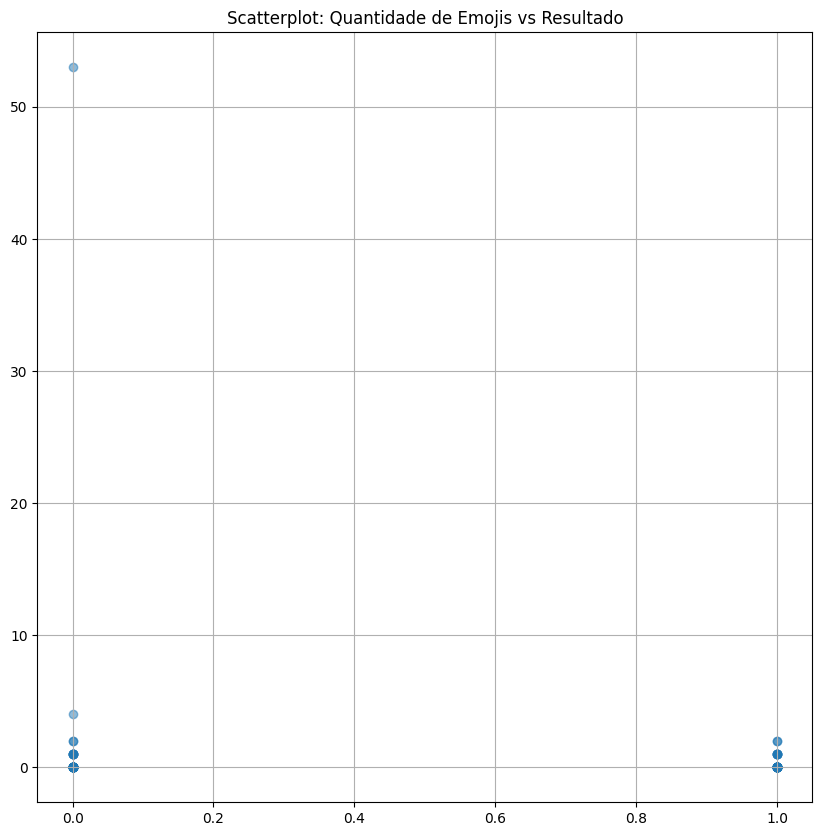

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(df['RESULTADO'], df['count_emoji'], alpha=0.5)
plt.title('Scatterplot: Quantidade de Emojis vs Resultado') #aparentemente não é claro a classificação. existe uma incidência enorme de emojis, mas parece um outlier.
plt.grid(True)
plt.show()


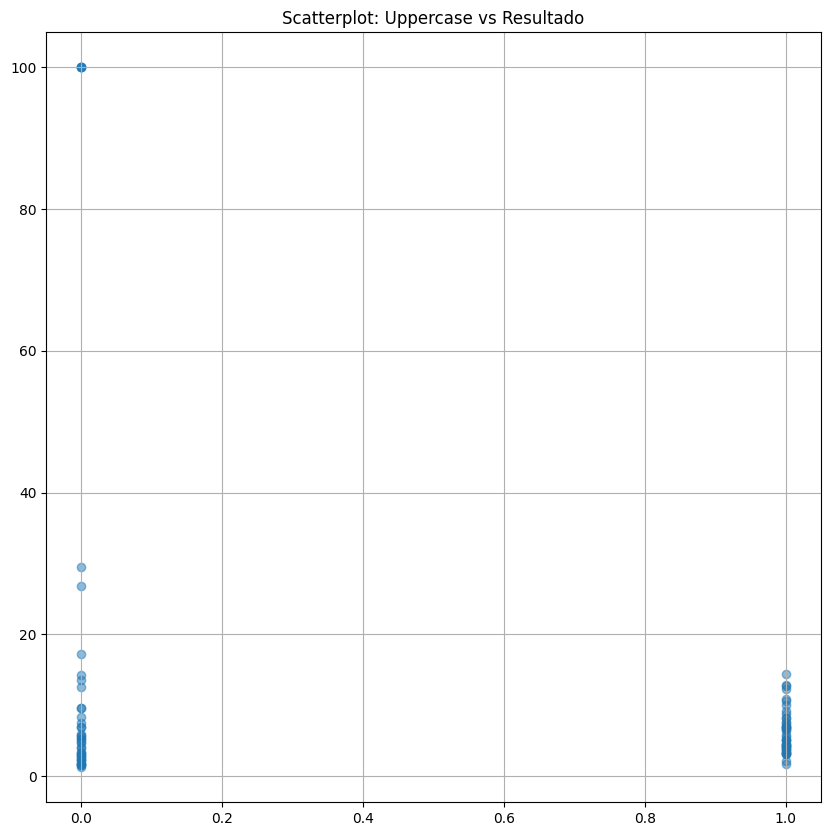

In [169]:
plt.figure(figsize=(10, 10))
plt.scatter(df['RESULTADO'], df['uppercase_percentage']*100, alpha=0.5)
plt.title('Scatterplot: Uppercase vs Resultado') #com notícias verdadeiras, é mais concentrado. diferente das notícias fakes
plt.grid(True)
plt.show()


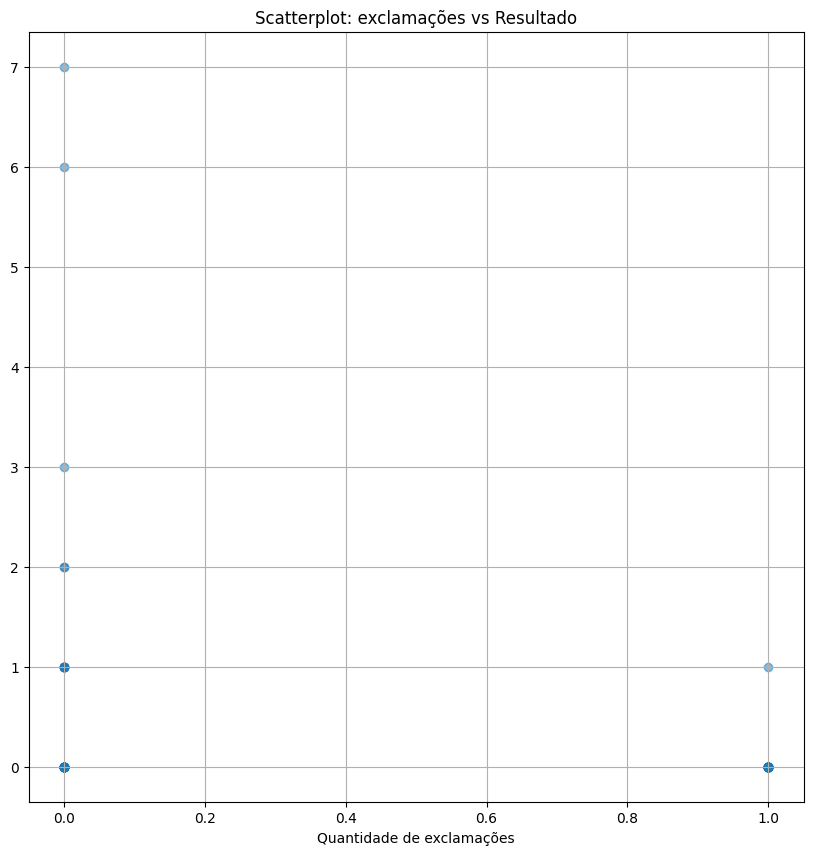

In [170]:
plt.figure(figsize=(10, 10))
plt.scatter(df['RESULTADO'], df['special_char_count'], alpha=0.5)
plt.xlabel('Quantidade de exclamações')
plt.title('Scatterplot: exclamações vs Resultado') #com notícias verdadeiras, o máximo foi 1. diferente das fake news, que acontecem com mt mais frequencia
plt.grid(True)
plt.show()


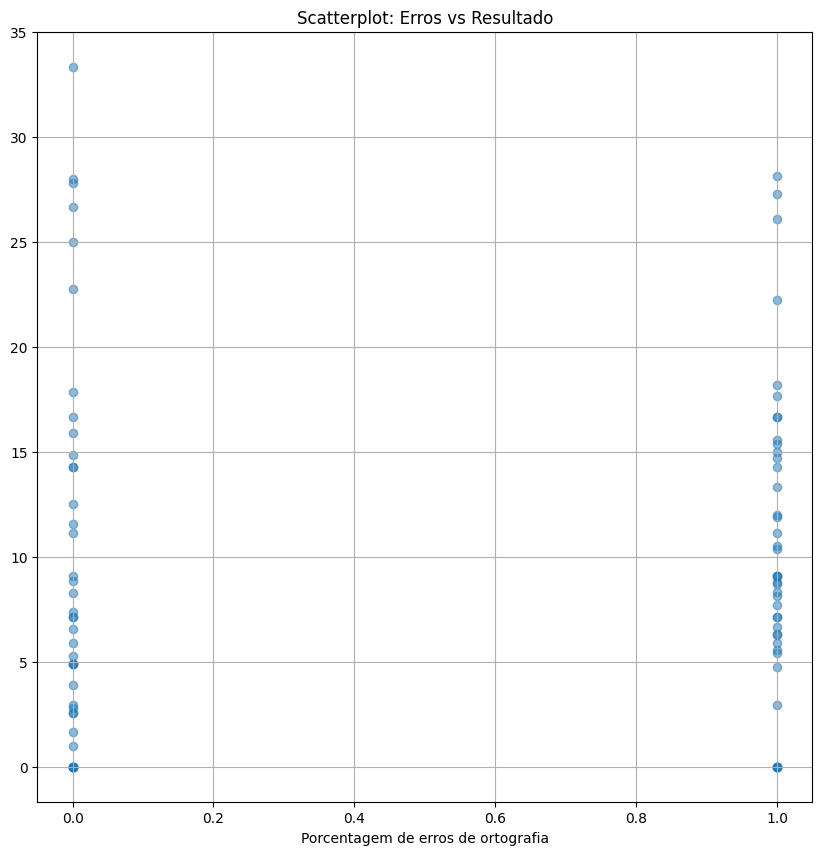

In [171]:
plt.figure(figsize=(10, 10))
plt.scatter(df['RESULTADO'], df['error_count']*100, alpha=0.5)
plt.xlabel('Porcentagem de erros de ortografia')
plt.title('Scatterplot: Erros vs Resultado') #difícil classificação visual, podendo ser erro da própria NLP escolhida. pode estar atrapalhando a classificação
plt.grid(True)
plt.show()


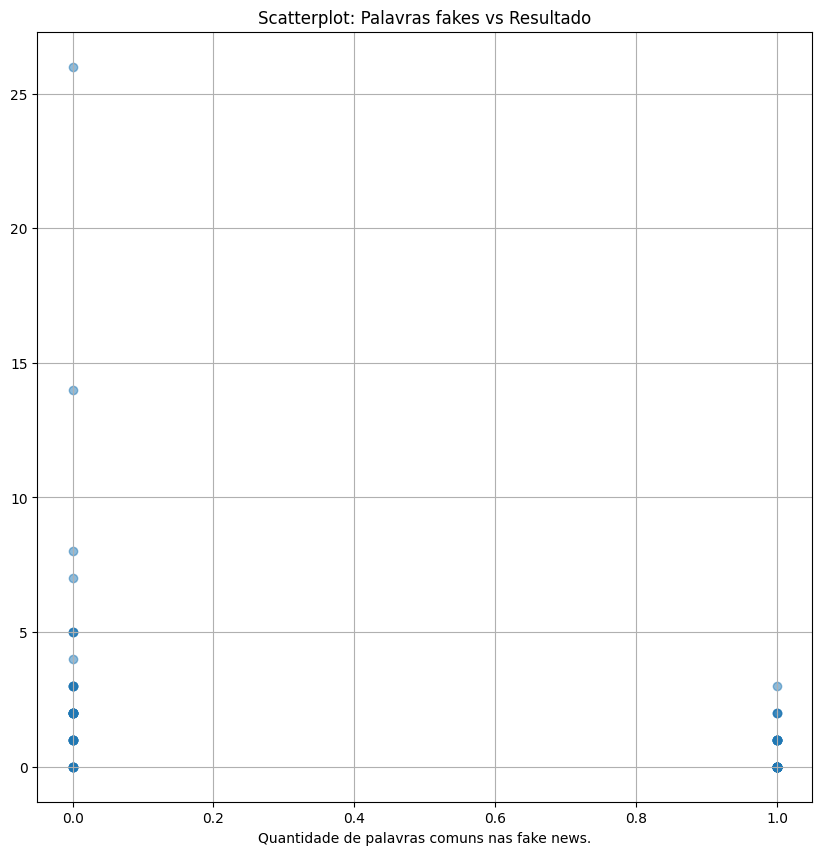

In [172]:
plt.figure(figsize=(10, 10))
plt.scatter(df['RESULTADO'], df['contagem_palavras_filtradas'], alpha=0.5)
plt.xlabel('Quantidade de palavras comuns nas fake news.')
plt.title('Scatterplot: Palavras fakes vs Resultado') #realmente aparecem mais nas fake news.
plt.grid(True)
plt.show()


Teste retirando os parâmetros que não pareceram ter diferenças.

In [173]:
dfTeste = df.drop(columns=['count_emoji','error_count','is_in_channels','is_in_social']) #dropo o que nao vi relação clara e faço o treinamento novamente.
dfTeste

,RESULTADO,uppercase_percentage,special_char_count,contagem_palavras_filtradas
1,1,0.066246,0,0
2,1,0.058005,0,0
3,1,0.069182,0,2
5,1,0.074468,0,0
6,0,0.135593,1,0
...,...,...,...,...
94,1,0.042683,0,1
95,1,0.092105,0,0
96,1,0.144444,0,0
97,1,0.032680,0,0


In [174]:
le = LabelEncoder()
dfTeste['RESULTADO'] = le.fit_transform(dfTeste['RESULTADO'])
dfTeste

,RESULTADO,uppercase_percentage,special_char_count,contagem_palavras_filtradas
1,1,0.066246,0,0
2,1,0.058005,0,0
3,1,0.069182,0,2
5,1,0.074468,0,0
6,0,0.135593,1,0
...,...,...,...,...
94,1,0.042683,0,1
95,1,0.092105,0,0
96,1,0.144444,0,0
97,1,0.032680,0,0


In [175]:
X = dfTeste.drop('RESULTADO', axis=1)
y = dfTeste['RESULTADO']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
#teste para encontrar o melhor modelo usando gridsearch:
xTeste = np.concatenate((X_train,X_test),axis=0)
yTeste = np.concatenate((y_train,y_test),axis=0)

resultados_arvore = []
resultados_random_forest = []
resultados_knn =[]
resultados_logistica = []
resultados_svm = []
resultados_neural = [] #faço isso que eu fiz para cada um dos resultados, ai vejo no final qual foi melhor

for i in range(30): #30 testes é um valor padrão.
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion ='entropy',min_samples_leaf=1,min_samples_split=5,splitter='best')
    score = cross_val_score(arvore, xTeste, yTeste, cv=kfold)
    resultados_arvore.append(score.mean())

    random = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=10)
    score = cross_val_score(random, xTeste, yTeste, cv=kfold)
    resultados_random_forest.append(score.mean())

    knn = KNeighborsClassifier()
    score = cross_val_score(knn, xTeste, yTeste, cv=kfold)
    resultados_knn.append(score.mean())

    logistic = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    score = cross_val_score(logistic, xTeste, yTeste, cv=kfold)
    resultados_logistica.append(score.mean())

    svm = SVC(C=10.0, kernel='linear')
    score = cross_val_score(svm, xTeste, yTeste, cv=kfold)
    resultados_svm.append(score.mean())

    #neural = MLPClassifier(activation='relu',batch_size=56,solver='adam', max_iter=400  , learning_rate_init=0.001)
    #score = cross_val_score(neural, xTeste, yTeste, cv=kfold)
    #resultados_neural.append(score.mean())


resultados = pd.DataFrame({'Arvore':resultados_arvore, 'Random':resultados_random_forest,
                           'KNN':resultados_knn, 'logistica':resultados_logistica,
                           'SVM':resultados_svm})
resultados

,Arvore,Random,KNN,logistica,SVM
0,0.658333,0.755556,0.755556,0.770833,0.781944
1,0.658333,0.722222,0.720833,0.786111,0.761111
2,0.600000,0.670833,0.758333,0.783333,0.772222
3,0.572222,0.645833,0.670833,0.768056,0.755556
4,0.597222,0.706944,0.730556,0.765278,0.754167
5,0.701389,0.691667,0.731944,0.777778,0.802778
6,0.608333,0.768056,0.680556,0.754167,0.765278
7,0.643056,0.720833,0.733333,0.770833,0.770833
8,0.634722,0.694444,0.744444,0.770833,0.745833
9,0.598611,0.758333,0.733333,0.769444,0.736111


In [179]:
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

melhor_score = 0
melhor_modelo = None

# Hiperparâmetros para testar
Cs = [0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf']

for C in Cs:
    for kernel in kernels:
        resultados_svm = []
        for i in range(30):  # 30 testes
            kfold = KFold(n_splits=10, shuffle=True, random_state=i)
            svm = SVC(C=C, kernel=kernel)
            score = cross_val_score(svm, xTeste, yTeste, cv=kfold)
            resultados_svm.append(score.mean())

        # Média dos resultados dos 30 testes
        media_score = sum(resultados_svm) / len(resultados_svm)

        # Verifica se o score atual é o melhor
        if media_score > melhor_score:
            melhor_score = media_score
            melhor_modelo = svm

# Treina o melhor modelo em todos os dados de treino
melhor_modelo.fit(xTeste, yTeste)

# Faz as previsões
y_pred = melhor_modelo.predict(xTeste)

# Matriz de confusão
matriz_confusao = confusion_matrix(yTeste, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(yTeste, y_pred, target_names=['Classe 0', 'Classe 1'])
print("\nRelatório de Classificação:")
print(relatorio_classificacao)

Matriz de Confusão:
[[26 14]
 [ 4 38]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.87      0.65      0.74        40
    Classe 1       0.73      0.90      0.81        42

    accuracy                           0.78        82
   macro avg       0.80      0.78      0.78        82
weighted avg       0.80      0.78      0.78        82



In [197]:
resultados = pd.DataFrame({
    'Texto': data['TEXT'],  # Supondo que você tenha uma coluna 'TEXT' com o texto original
    'Real': yTeste,
    'Predito': y_pred,
    'Correto': yTeste == y_pred
})

# Exibe os resultados
print(resultados)  # Mostra as primeiras linhas do DataFrame
resultados.to_excel('resultados.xlsx')

                                                Texto  Real  Predito  Correto
1   Santa Catarina  Número de cidades em emergênci...     0        0     True
2   Irã  Presidente era conhecido como  carniceiro...     0        0     True
3   Corinthians fala em negociação legal após denú...     0        0     True
5   Segundo hospital de campanha é aberto em Porto...     1        1     True
6   Luladrão gastou  MILHÕES visitando monstros di...     1        1     True
..                                                ...   ...      ...      ...
94  Eliminação de judoca brasileiro nas Olimpíadas...     0        0     True
95  Estudo inédito mostra que   dos pacientes com ...     0        0     True
96  Os Efeitos da Elevação do Nível do Mar nas Pra...     0        1    False
97  Sócios do São Paulo barram mudança que previa ...     0        0     True
98  Lula x Bolsonaro    Pastores evangélicos estão...     0        1    False

[82 rows x 4 columns]


In [202]:
teste = df.head(1)
teste = teste.drop(columns=['RESULTADO','count_emoji','is_in_social','is_in_channels','error_count'])
teste

,uppercase_percentage,special_char_count,contagem_palavras_filtradas
0,0.066246,0,0


In [209]:
from joblib import dump, load

# Salvar o modelo em um arquivo .joblib
dump(melhor_modelo, '/content/drive/MyDrive/IA-projeto/aplicação/melhor_modelo.joblib')
dump(scaler, '/content/drive/MyDrive/IA-projeto/aplicação/scaler.pkl')
print("Modelo salvo com sucesso.")

Modelo salvo com sucesso.


In [210]:
dump(scaler, '/content/drive/MyDrive/IA-projeto/aplicação/scaler.pkl')


['/content/drive/MyDrive/IA-projeto/aplicação/scaler.pkl']

In [203]:
teste = scaler.transform(teste)
teste

array([[-0.227532  , -0.30570892, -0.65898084]])

In [204]:
classe_prevista = melhor_modelo.predict(teste)
classe_prevista

array([1])

In [180]:
means = resultados.mean()
means


,0
Arvore,0.627593
Random,0.716852
KNN,0.727176
logistica,0.772361
SVM,0.759861


In [181]:
max = resultados.max()
max


,0
Arvore,0.701389
Random,0.772222
KNN,0.766667
logistica,0.797222
SVM,0.802778


Conclusão:

Retirar os parâmetros de contagem de emoji e erro ortográfico foi melhor para a classificação na média.

O melhor modelo na média foi SVM com média de 87%.

No máximo, foi a árvore de decisão com 91%.

Será possível entregar tudo que foi prometido na proposta.